<a href="https://colab.research.google.com/github/kmouleejunhyuk/bigdata_analysist_practical/blob/main/Diamond_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statsmodels
import scipy

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/diamonds.csv',index_col=0)

#EDA

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


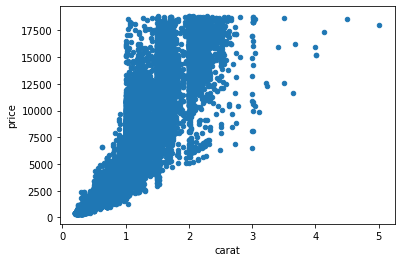

In [ ]:
df.plot.scatter(x = 'carat', y = 'price')

#carat과 price사이의 상관계수와 상관계수의 p-value값은?



In [ ]:
df.corr().loc['carat', 'price']

0.9215913011935697

In [ ]:
from scipy import stats

In [ ]:
correlation, pvalue = stats.pearsonr(df['carat'], df['price'])
print(f'corr : {correlation}, pv : {pvalue}')

corr : 0.9215913011934771, pv : 0.0


In [ ]:
#즉 캐럿과 가격의 상관계수는 0.92이며
#귀무가설: 상관계수는 유의미하지 않다(무의미하다)
#대립가설: 유의미하다
#에서 귀무가설을 pv에 의해 기각한다. 즉 상관계수 0.92는 통계적으로 유의미하다

#Diamond의 평균가격은 3932로 알려져있다. ‘H’ color를 가지는 다이아몬드 집단의 평균에 대한 일표본 t검정을 시행하려한다. 통계량과 pvalue값을 구하시오. 유의수준 0.05에서 귀무가설 채택여부를 boolean 값으로 표현할 변수(hypo) 만들고 출력하시오

In [ ]:
#귀무가설: 평균가격은 3932가 아니다
#대립가설: 3932이다

In [ ]:
H_prop = df[df['color'] == 'H']
stat, pval = stats.ttest_1samp(H_prop['price'], 3932)

if pval<0.05:
    null_hypo = False
else:
    null_hypo = True

print(f'stat : {stat}, pval : {pval}, hypo : {null_hypo}')

stat : 11.988997411117696, pval : 7.569973305218302e-33, hypo : False


#그래프상에서 ‘F’와 ‘G’는 평균이 유사해보인다.이를 확인하기 위해 집단간 등분산(levene,fligner,bartlett) 검정을 시행 후 결과를 출력하고 조건에 맞는 독립표본 t검정을 시행하라

In [ ]:
F_prop = df[df['color'] == 'F']
G_prop = df[df['color'] == 'G']

In [ ]:
s, pvalue = stats.levene(F_prop['price'], G_prop['price'])
print(f'levene \nstats : {s}, pv : {pvalue}')

levene 
stats : 53.627886257416655, pv : 2.511093007074788e-13


In [ ]:
correlation, pvalue = stats.fligner(F_prop['price'], G_prop['price'])
print(f'fligner\nstats : {s}, pval : {pvalue}')

fligner
stats : 53.627886257416655, pval : 1.155244880009172e-09


In [ ]:
correlation, pvalue = stats.bartlett(F_prop['price'], G_prop['price'])
print(f'bartlett\nstats : {s}, pval : {pvalue}')

bartlett
stats : 53.627886257416655, pval : 5.424264079418252e-12


In [ ]:
#즉 3개 등분산 검정에서 집단 간 분산의 차이는 유의미하다(차이가 있다)

In [ ]:
#평균에 대한 독립표본 t검정(귀무: 평균에 차이가 없다, 대립: 평균에 차이가 있다)

In [ ]:
stats.ttest_ind(G_prop['price'], F_prop['price'], equal_var = False)

Ttest_indResult(statistic=5.045279980436125, pvalue=4.5670321227041464e-07)

In [ ]:
#즉 색이 G인 그룹이 평균이 유의미하게 높다(5.04)

#color ‘F’,’G’,’D’ 세집단의 price값들에 대해 anova분석을 시행하라.

In [ ]:
D_prop = df[df['color'] == 'D']

In [ ]:
#등분산검정
print(stats.levene(F_prop['price'], D_prop['price'], G_prop['price']))
print(stats.fligner(F_prop['price'], D_prop['price'], G_prop['price']))
print(stats.bartlett(F_prop['price'], D_prop['price'], G_prop['price']))

#분산에 차이가 있다

LeveneResult(statistic=118.97521469312785, pvalue=3.557425577381817e-52)
FlignerResult(statistic=494.64591695585733, pvalue=3.881538382653518e-108)
BartlettResult(statistic=289.14364432535103, pvalue=1.634012581050329e-63)


In [ ]:
#정규성검정 다시
print(stats.kstest(F_prop['price'], 't', (2,)))

KstestResult(statistic=0.9999957252352188, pvalue=0.0)


In [ ]:
#분산분석
print(stats.f_oneway(F_prop['price'], D_prop['price'], G_prop['price']))

#분산분석 결과 귀무가설 기각, 유의수준 하에서 세 집단 중 어느 두 집단의 분산은 같지 않다

F_onewayResult(statistic=101.1811790316069, pvalue=1.6513790091285713e-44)


#연속형 변수(carat,depth,table,price,x,y,z) 각각의 이상치(1,3분위값에서 IQR*1.5 외의 값) 갯수를 데이터 프레임(변수명 ratio_df, 비율의 내림차순 정렬)으로 아래와 같이 나타내어라.

In [ ]:
ratio_df = pd.DataFrame()
column = []
ratio = []
for col in ['carat','depth','table','price','x','y','z']:
    cutoff = (df[col].quantile(0.75) - df[col].quantile(0.25) ) * 1.5
    lower, upper = df[col].quantile(0.25) - cutoff, df[col].quantile(0.75) + cutoff
    c = df[(df[col] < lower) | (df[col] > upper)][col].count()
    column.append(col)
    ratio.append(c)

ratio_df['column'] = column
ratio_df['ratio'] = ratio

In [ ]:
ratio_df.sort_values(by = 'ratio', ascending = False)

,column,ratio
3,price,3540
1,depth,2545
0,carat,1889
2,table,605
6,z,49
4,x,32
5,y,29


#color에 따른 price의 max, min, 평균값을 colorDf 변수에 저장하고 아래와 같이 출력하는 코드를 작성하라

In [ ]:
colordf = pd.DataFrame()

colordf['max'] = df.groupby(by='color').max().loc[:, 'price'].values
colordf['min'] = df.groupby(by='color').min().loc[:, 'price'].values
colordf['mean'] = df.groupby(by='color').mean().loc[:, 'price'].values

colordf.index = df.groupby(by='color').max().index

In [ ]:
colordf

,max,min,mean
color,,,
D,18693,357,3169.954096
E,18731,326,3076.752475
F,18791,342,3724.886397
G,18818,354,3999.135671
H,18803,337,4486.669196
I,18823,334,5091.874954
J,18710,335,5323.818020


#전체 데이터중 color의 발생빈도수에 따라 labelEncoding(빈도수 적은것 : 1, 빈도수 증가할수록 1씩증가)을 하고 colorLabel 컬럼에 저장하고 cut에 따른 colorLabel의 평균값을 구하여라


In [ ]:
index = dict()
for c, idx in zip(df['color'].value_counts(ascending = True).index, enumerate(df['color'].value_counts(ascending = True).values, start = 1)):
    index[c] = index.get(c, 0) + idx[0] 
index
#sorted(index, key = lambda x: x[1], reverse = False)

{'D': 3, 'E': 6, 'F': 5, 'G': 7, 'H': 4, 'I': 2, 'J': 1}

In [ ]:
colorlabel = []
for _ in range(df.shape[0]):
    color = df.loc[_ + 1, 'color']
    colorlabel.append(index[color])

In [ ]:
df['colorlabel'] = colorlabel

In [ ]:
df.groupby(by = 'cut').mean().loc[:, 'colorlabel']

cut
Fair         4.516770
Good         4.562780
Ideal        4.769152
Premium      4.644913
Very Good    4.654362
Name: colorlabel, dtype: float64

#price의 값에 따른 구간을 1000단위로 나누고 priceLabel 컬럼에 저장하라. 저장시 숫자 순으로 label하고(0 ~ 999 : 0,1000 ~ 1999 :1 …) 최종적으로 구간별 갯수(변수명:labelCount)를 출력하라

In [ ]:
bins = list(range(0, 19001, 1000))

In [ ]:
bins_label = [i for i, _ in enumerate(bins)]
bins_label

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
df['bin'] = pd.cut(df['price'], bins, right = False, labels = bins_label[:-1])

In [ ]:
labelcount = pd.DataFrame()
labelcount['binsection'] = [x for x in df['bin'].value_counts().index]
labelcount['value_counts'] = df['bin'].value_counts().values

In [ ]:
labelcount

,binsection,value_counts
0,0,14499
1,1,9704
2,2,6131
3,4,4653
4,3,4226
5,5,3174
6,6,2278
7,7,1669
8,8,1307
9,9,1076
